# Chapter 04 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("berkeley.csv")
df = df[df["Major"] != "Other"]

 All applicants for department A

In [4]:
subset = df[df["Major"] == "A"]
pd.crosstab(subset["Admission"], subset["Gender"], margins=True)

Gender,F,M,All
Admission,,,
Accepted,89,825,914
Rejected,19,313,332
All,108,1138,1246


 All applicants for department A (variation)

In [5]:
subset = df[df["Major"] == "A"]
pd.crosstab(subset["Gender"], subset["Admission"], margins=True)

Admission,Accepted,Rejected,All
Gender,,,
F,89,19,108
M,825,313,1138
All,914,332,1246


 All applicants for department E

In [6]:
subset = df[df["Major"] == "E"]
pd.crosstab(subset["Admission"], subset["Gender"], margins=True)

Gender,F,M,All
Admission,,,
Accepted,94,53,147
Rejected,299,138,437
All,393,191,584


 All applicants for department E (percent by column)

In [7]:
(pd.crosstab(subset["Admission"], subset["Gender"],
             margins=True, normalize="columns") * 100).round(2)

Gender,F,M,All
Admission,,,
Accepted,23.92,27.75,25.17
Rejected,76.08,72.25,74.83


## Resampling experiment

In [8]:
random.seed(123)
hat = [1] * 147 + [0] * 437

differences = []
for _ in range(2_000):
    random.shuffle(hat)
    females = hat[:393]
    males = hat[393:]
    # calculate difference and admission rates for females and males
    admit_females = 100 * sum(females) / len(females)
    admit_males = 100 * sum(males) / len(males)
    differences.append(admit_females - admit_males)

observed = -3.83
n_extreme = sum(np.array(differences) <= observed)
p_value = n_extreme / len(differences)
print(f"First trial difference {differences[0]:.2f}")
print(f"Number of extreme trials = {n_extreme}")
print(f"p_value = {p_value:.4f}")

First trial difference -2.27
Number of extreme trials = 354
p_value = 0.1770


 Visualize the distribution of differences

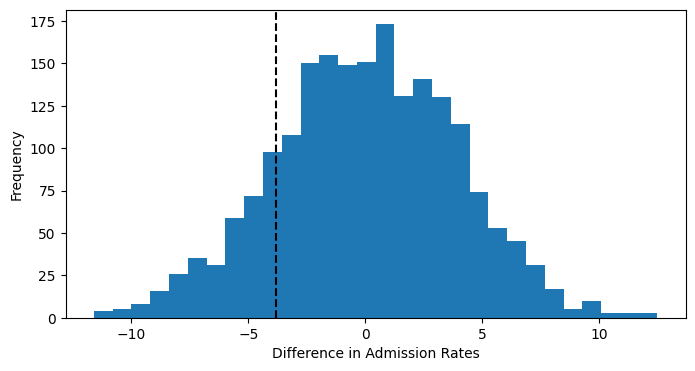

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(differences, bins=30, color="C0")
ax.axvline(observed, color="black", linestyle="--")
ax.set_xlabel("Difference in Admission Rates")
ax.set_ylabel("Frequency")
plt.show()

# Example: smoking and gender

 Load and process the data

In [10]:
data = pd.read_csv("PulseNew.csv")
data.head()

,PuBefore,PuAfter,Ran?,Smokes?,Sex,Height,Weight,ActivityL
0,48,54,no,yes,male,68.0,150,1
1,54,56,no,yes,male,69.0,145,2
2,54,50,no,no,male,69.0,160,2
3,58,70,yes,no,male,72.0,145,2
4,58,58,no,no,male,66.0,135,3


 Create 2x2 table

In [11]:
ct = pd.crosstab(data["Smokes?"], data["Sex"], margins=True, normalize="columns")
100 * ct.round(4)

Sex,female,male,All
Smokes?,,,
no,77.14,64.91,69.57
yes,22.86,35.09,30.43
